## 141B Final Project
## The Relationship among Location, Price, Rating, and Reveiw Count of Restaurants
### Team Member:
1. Wei-Kuang Lin, ID: 997062562
2. E-Shen Wu, ID: 914526861

### Components:
1. Introduction
2. Data Extraction, Munging and Storage
3. Exploratory data analysis and Summary Statistics
4. Data Visualization
5. Questions that We Want to Answer
6. Data analysis and Statistics
7. Conclusion

## 1. Introduction 
Eating is very important in our life. Besides, people not only pursue being full but also chase gourmet. We can get lots of information about restaurant from magazine and ad. Recently, because of the popularity of the Internet, there are tone of information on the internet, especially about restaurant. I and my partner are interested in finding good restaurant. After mining data from website, we find something interesting and like to share in class.

## 2. Data Extraction, Munging and Storage

### 2.1 Data source
* Yelp API [link](https://www.yelp.com/developers/documentation/v3)
* Zillow house sale price stored in the [SQLite database](http://anson.ucdavis.edu/~nulle/sf_data.sqlite)
* Shapefiles for US postal codes [download](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html)
* Shapefiles for San Francisco Neighborhoods [download from export](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4)

### 2.2 Data Extraction, Munging and Storage

Import required packages

In [113]:
# api
from yelpapi import YelpAPI
from pprint import pprint
from yelpapi import YelpAPI
yelp_api = YelpAPI("dH5aLF2xpz8MoGLL1f2ZAMSEmBpHANMG4eomYx_lyfWtqNVaBEYBG40WrLafmscfyJbntVeJgamD1v5suDY7K8305YMtXuRzAtf6wdfutg1wamwrbNBg0PpXXOycWnYx")

# data storage
import requests_cache
requests_cache.install_cache('project_cache')

# sql-related
import sqlalchemy as sqla
import sqlite3

# data processing
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# geo
import geopandas as gpd         # conda install -c conda-forge geopandas
import osmnx as ox              # conda install -c conda-forge osmnx
import shapely.geometry as geom # conda install -c conda-forge shapely
import matplotlib.patches as mpatches

Data extraction from yelp api - Restaurants and Coffee shops in Davis

In [6]:
#davis price =1 list (91data)
davis_price_1_list=[]
for x in range(0,100,50):
    search_results = yelp_api.search_query(term='restaurant', location='davis, ca',price='1',sort_by='rating',offset=x, limit=50)
    davis_price_1_list.append(search_results) 
#davis_price_1_list

#davis price =2 list (68data)
davis_price_2_list=[]
for x in range(0,68,50):
    search_results = yelp_api.search_query(term='restaurant', location='davis, ca',price='2',sort_by='rating',offset=x, limit=50)
    davis_price_2_list.append(search_results)
#davis_price_2_list

#davis coffee list (96data)
davis_coffee_list=[]
for x in range(0,96,50):
    search_results = yelp_api.search_query(term='coffee', location='davis, ca',sort_by='rating',offset=x, limit=50)
    davis_coffee_list.append(search_results)
#davis_coffee_list

Data extraction from yelp api - Restaurants and Coffee shops in San Francisco

In [7]:
#SF price =1 list (1000data)
sf_price_1_list=[]
for x in range(0,1000,50):
    search_results = yelp_api.search_query(term='restaurant', location='San Francisco, ca',price='1',sort_by='rating',offset=x, limit=50)
    sf_price_1_list.append(search_results)
#sf_price_1_list


#SF price =2 list (1000data)
sf_price_2_list=[]
for x in range(0,1000,50):
    search_results = yelp_api.search_query(term='restaurant', location='San Francisco, ca',price='2',sort_by='rating',offset=x, limit=50)
    sf_price_2_list.append(search_results)
#sf_price_2_list


#SF price =3 list (236data)
sf_price_3_list=[]
for x in range(0,236,50):
    search_results = yelp_api.search_query(term='restaurant', location='San Francisco, ca',price='3',sort_by='rating',offset=x, limit=50)
    sf_price_3_list.append(search_results)
#sf_price_3_list


#SF price =4 list (60data)
sf_price_4_list=[]
for x in range(0,60,50):
    search_results = yelp_api.search_query(term='restaurant', location='San Francisco, ca',price='4',sort_by='rating',offset=x, limit=50)
    sf_price_4_list.append(search_results)
#sf_price_4_list


#SF coffee list (1000data)
sf_coffee_list=[]
for x in range(0,1000,50):
    search_results = yelp_api.search_query(term='coffee', location='San Francisco, ca',sort_by='rating',offset=x, limit=50)
    sf_coffee_list.append(search_results)
#sf_coffee_list

Data Frame Construction : use raw Api to make Geo Panda

In [9]:
def data_frame (input_list):
    '''Action: Turn raw Api into Geo Panda
       Argument: input_list is the result of the request of yelp api
       Return: Geo Panda
    '''
    
    # Prepare empty dfs
    sfid = pd.DataFrame()
    sfname = pd.DataFrame()
    sfreview_count = pd.DataFrame()
    sfrating = pd.DataFrame()
    sfcoordinates = pd.DataFrame()
    sfprice = pd.DataFrame()
    sflocation = pd.DataFrame()

    # 1st loop for jth-sub list in the big list
    len_list= len(input_list)
    for j in range(len_list):
        search_results= input_list[j]
        
        # 2nd loop for ith element in the j-th-sublist
        for i in range(len( input_list[j]['businesses'])) :
            try:
                dfid=pd.Series(search_results['businesses'][i]['id'])
                sfid = sfid.append(dfid,ignore_index=True)
                dfname=pd.Series(search_results['businesses'][i]['name'])
                sfname = sfname.append(dfname,ignore_index=True)
                dfreview_count=pd.Series(search_results['businesses'][i]['review_count'])
                sfreview_count = sfreview_count.append(dfreview_count,ignore_index=True)
                dfrating=pd.Series(search_results['businesses'][i]['rating'])
                sfrating = sfrating.append(dfrating,ignore_index=True)
                dfcoordinates=pd.Series(search_results['businesses'][i]['coordinates'])
                sfcoordinates = sfcoordinates.append(dfcoordinates,ignore_index=True)
                dfprice=pd.Series(search_results['businesses'][i]['price'])
                sfprice = sfprice.append(dfprice,ignore_index=True)
                dflocation=pd.Series(search_results['businesses'][i]['location'])
                sflocation = sflocation.append(dflocation,ignore_index=True)
            
            except:
                pass
            
    DF = pd.concat([sfid, sfname, sfreview_count, sfrating,sfcoordinates,sfprice,sflocation], axis=1)
    DF.columns = ['id', 'name','review_count','rating','latitude','longitude','price','address1','address2','address3','city','country','display_address','state','zip_code']
    
    # Convert daivsmergeprice1_2 to a GeoPanda Data Frame
    Inglat = [ geom.Point (x) for x in zip (DF.longitude,  DF.latitude)]
    DF = gpd.GeoDataFrame(DF, geometry = Inglat)
    
    return (DF)

In [97]:
davis_price_1_geo = data_frame(davis_price_1_list)

In [12]:
davis_price_2_geo = data_frame(davis_price_2_list)

In [13]:
davis_coffee_geo = data_frame(davis_coffee_list)

In [14]:
sf_price_1_geo = data_frame(sf_price_1_list)

In [15]:
sf_price_2_geo = data_frame(sf_price_2_list)

In [16]:
sf_price_3_geo = data_frame(sf_price_3_list)

In [17]:
sf_price_4_geo = data_frame(sf_price_4_list)

In [98]:
sf_coffee_geo = data_frame(sf_coffee_list)

In [19]:
# example of the look of this data frame
sf_price_4_geo.head(3)

,id,name,review_count,rating,latitude,longitude,price,address1,address2,address3,city,country,display_address,state,zip_code,geometry
0,kusakabe-san-francisco,KUSAKABE,681.0,4.5,37.795702,-122.402885,$$$$,584 Washington St,,,San Francisco,US,"[584 Washington St, San Francisco, CA 94111]",CA,94111,POINT (-122.402884835582 37.7957017702111)
1,gary-danko-san-francisco,Gary Danko,4700.0,4.5,37.805870,-122.420580,$$$$,800 N Point St,,,San Francisco,US,"[800 N Point St, San Francisco, CA 94109]",CA,94109,POINT (-122.42058 37.80587)
2,casa-flores-san-francisco,Casa Flores,66.0,5.0,37.790167,-122.424256,$$$$,1808 California St,None,,San Francisco,US,"[1808 California St, San Francisco, CA 94109]",CA,94109,POINT (-122.424255779929 37.7901670472844)


Data extraction for restaurants which are available during the midnight between Friday and Saturday. We use [business lookup](https://www.yelp.com/developers/documentation/v3/business) in Yelp to extract the business hour for each restaurant.

In [20]:
# overnight (status = open) on d-th weekday
def overnight(input_df, d):
    '''Action: Add the availability of overnight on Friday for each restaurant
       Argument: input_df is a dataframe contains "business id", d is the d-th of weekday
       Return: A datafram contains restaurants available for overnight on Friday
    '''
    idlist = input_df['id'].tolist()
    openornot = pd.DataFrame()
    
    for i in range(input_df.shape[0]):
        search_results = yelp_api.business_query(idlist[i])
        
        try:
            dfopen=pd.Series(search_results['hours'][0]['open'][d]['is_overnight'])
        except:
            dfopen=pd.Series(False)
        
        openornot = openornot.append(dfopen,ignore_index=True)
    
    #openornot
    #0 represent is not overnight 1 represent is overnight
    df = input_df['id'].to_frame()
    overnight_df = pd.concat([df,openornot], axis=1) 
    overnight_df.columns = ['id', 'overnight']
    overnight_df
    
    # Merge price into geo
    merged = input_df.merge(overnight_df, left_on='id', right_on='id', how='left' )
    
    # Select overnight > 1 
    overnigt = merged.loc[ merged.overnight > 0, ]
    
    return(overnigt ) 

In [21]:
davis_price_1_overnight = overnight(davis_price_1_geo, d= 5)

In [22]:
davis_price_2_overnight = overnight(davis_price_2_geo, d= 5)

In [23]:
sf_price_1_overnight = overnight(sf_price_1_geo, d= 5)

In [24]:
sf_price_2_overnight = overnight(sf_price_2_geo, d= 5)

In [25]:
sf_price_3_overnight = overnight(sf_price_3_geo, d= 5)

In [26]:
sf_price_4_overnight = overnight(sf_price_4_geo, d= 5)

In [28]:
# example: overnight info is in the last column. 0 = closed, 1 = open
sf_price_1_overnight.head(3)

,id,name,review_count,rating,latitude,longitude,price,address1,address2,address3,city,country,display_address,state,zip_code,geometry,overnight
26,handy-deli-san-francisco,Handy Deli,164.0,4.5,37.763554,-122.477489,$,1815 Irving St,,,San Francisco,US,"[1815 Irving St, San Francisco, CA 94122]",CA,94122,POINT (-122.4774885 37.7635545),1.0
29,golden-boy-pizza-san-francisco,Golden Boy Pizza,2777.0,4.5,37.799796,-122.408073,$,542 Green St,,,San Francisco,US,"[542 Green St, San Francisco, CA 94133]",CA,94133,POINT (-122.4080729 37.7997956),1.0
51,tselogs-san-francisco-5,Tselogs,366.0,4.5,37.786560,-122.412950,$,552 Jones St,,,San Francisco,US,"[552 Jones St, San Francisco, CA 94102]",CA,94102,POINT (-122.41295 37.78656),1.0


1. Merged SF resutuarnts from price 1 to 4 into a big data frame
2. Assign correct strings to dollar sign "$", so python could recongize the price correctly.

In [35]:
SF_Big_DF = pd.DataFrame()
SF_Big_DF= SF_Big_DF.append(sf_price_1_geo)
SF_Big_DF = SF_Big_DF.append(sf_price_2_geo)
SF_Big_DF = SF_Big_DF.append(sf_price_3_geo)
SF_Big_DF = SF_Big_DF.append(sf_price_4_geo)

# Convert Price to a readable factor
L = SF_Price_DF.price.tolist()
d = L.copy()
for x in range(len(L)):
    if L[x] == "$":
        d[x] = "Price_1"
    elif L[x] == "$$":
        d[x] = "Price_2"
    elif L[x] == "$$$":
        d[x] = "Price_3"
    else: d[x] = "Price_4"

SF_Big_DF.insert(0,"price_label", d)

In [40]:
# check
SF_Big_DF.shape

(2297, 17)

In [45]:
# save this SF Big data as csv for the sake of reusing it to do analysis
DF= SF_Big_DF.copy()
DF= pd.DataFrame(DF)
DF.to_csv("SF_Big_DF.csv")

Mapping preparation

In [29]:
# Davis map
US_zip = gpd.read_file("C:/Users/WeiKuang/Documents/GitHub/data/us_zip/cb_2016_us_zcta510_500k.shp")
Keep = ["95616","95618"]
Davis_Map =  US_zip[ US_zip.GEOID10.isin(Keep)]

# SF map
SF_Map = gpd.read_file("C:/Users/WeiKuang/Documents/GitHub/data/SF_zip/geo_export_b8d0ed93-730c-44ae-8d05-66a86114a164.shp")

In [30]:
# SF_Land_Price_Map 
# Let's create the sqlite file, and create the connection.
sqlite_file = 'C:/Users/WeiKuang/Documents/GitHub/data/sf_data.sqlite'
sf_conn = sqla.create_engine('sqlite:///' + sqlite_file)    # sf_conn is the connection between SQL and python

housing = pd.read_sql_query("""select * from zillow""",sf_conn)
housing = housing[['RegionName','Date','MedianSoldPricePerSqft_AllHomes']]
housing = housing.dropna(axis=0, how='any')  # remove the row(axis =0) if the row contians any NA.

# convert Date to real "Date" data
housing['Date'] = pd.to_datetime(housing["Date"])
# RegionNmae unquie list
SF_code = housing['RegionName'].unique().tolist()
SoldPrice = pd.DataFrame()

for i in SF_code:
    df = housing[housing['RegionName'] == i]       # Select one zipcode at a time
    df1 = df [ df['Date'] == df['Date'].max() ]    # Then, select its most recent data
    SoldPrice = SoldPrice.append(df1, ignore_index=True)
    
SoldPrice = SoldPrice.sort_values(by=['MedianSoldPricePerSqft_AllHomes'])

# counties = gpd.read_file("shapefiles/counties/cb_2016_us_county_500k.shp")
US_zip = gpd.read_file("C:/Users/WeiKuang/Documents/GitHub/data/us_zip/cb_2016_us_zcta510_500k.shp")

Keep = []
for x in SF_code:
    s = str(x)
    Keep = Keep + [s]
    
Keep.remove('94080')

SF =  US_zip[ US_zip.GEOID10.isin(Keep)]
SF['GEOID10'] = pd.to_numeric(SF['GEOID10']) 

# joint
merged = SoldPrice.merge(SF, left_on='RegionName', right_on='GEOID10', how='inner' )

# Conver it back to GeoDataFrame in order to plot
SF_Price_Map = gpd.GeoDataFrame(merged)

C:\Users\WeiKuang\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 3. Exploratory data analysis and Summary Statistics

### 3.1.  Overnight status and the umber restaurants by price in SF and Davis

Region   |Price        | The Total Number          | Overnight on Friday
---------|-------------| -----------------------------------------------
`SF`     |`Price 1 `   | 1700                      | 113
`SF`     |`Price 2`    | 2100                      | 87
`SF`     |`Price 3`    | 236                       | 7
`SF`     |`Price 4`    | 60                        | 0
`Davis`  |`Price 1`    | 91                        | 15
`Davis`  |`Price 2`    | 69                        | 7



### 3.2. Summary Statistics of rating and review count for restaurants in SF and Davis
- Note: std is sample standard deviation

Region   |Price        | average review count (std)      |average rating (std)
---------|-------------| -----------------------------------------------
`SF`     |`Price 1`    | 328.36 (400.00)                 | 3.93 (0.42)
`SF`     |`Price 2`    | 658.21 (746.06)                 | 4.02 (0.31)
`SF`     |`Price 3`    | 895.49 (972.91)                 | 3.83 (0.52)
`SF`     |`Price 4`    | 544.52 (772.53)                 | 4.18 (0.44)
`Davis`  |`Price 1`    | 193.25 (213.45)                 | 3.47 (0.635)
`Davis`  |`Price 2`    | 271.66 (268.31)                 | 3.56 (0.46)


### 3.3. Technical problem in data extracting - Yelp has a limit on the result 

Yelp could show the total number of result under our request. However, the number of actual data is limited to 1000. Thus, we can only get 1000 restaurants for Price 1 and Price 2, respectively in SF. With this incomplete dataset, we will be careful to interpret our data.

### 3.4. Summary of the trend 
1. SF  has more restaurants than Davis
3. Davis has no Price 3 and Price 4 restaurants.
4. In SF, Price 2 resturants are the most and Price 4 resturants are the least. 
5. In SF and Davis, as the price increases, the availability on Friday overnight decreases.
6. In SF, No price 4 resturants are availabile during Friday overnight
7. For review count, customers are more likely to leave review on price 2 and price 3 restaurants.
8. For rating (scale from 1.5 to 5 by 0.5 ), it seems there is no difference, but we will perform analysis to confirm this.

## 4. Data Visualization

### 4.1 Mapping- Davis Restaurants Price 1&2
1. Davis only has no Price 1&2 restaurants. Most of them located on the downtown
2. Other small clusters correspond to the shopping squares.

(38.475, 38.61)

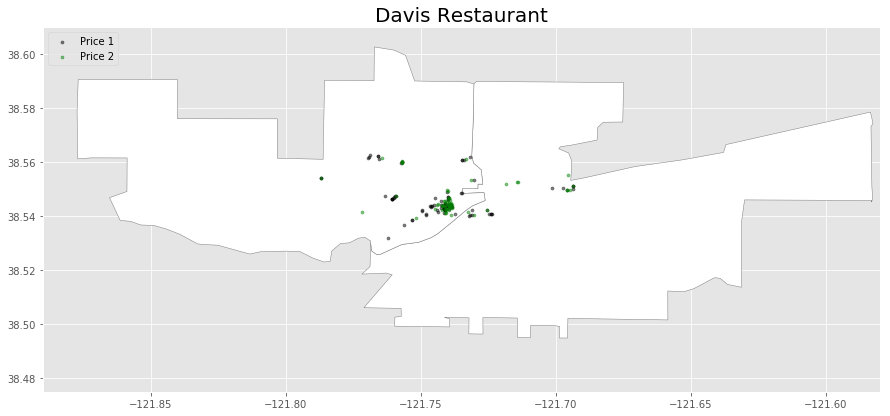

In [89]:
# Plotting
ax = Davis_Map.plot(color ="white" , edgecolor ="gray" , figsize = (15, 15))
davis_price_1_geo.plot(ax= ax, color= "black", markersize=10, alpha=0.5 ,label="Price 1")
davis_price_2_geo.plot(ax= ax, color= "green", markersize=10, alpha=0.5 ,label="Price 2")

plt.legend(loc=2)
plt.title('Davis Restaurant',fontsize=20 )

# Zoom out
#ax.set_xlim([-121.788, -121.7])
#ax.set_ylim([38.52, 38.57])

# Zoom in
ax.set_xlim([-121.89, -121.58])
ax.set_ylim([38.475, 38.61])

### 4.2 Mapping- Davis Restaurant - Price 1&2 - Overnight on Friday
1. Most of them located in downtown. This reflects the truth that downtown provide more night activity. 

(38.475, 38.61)

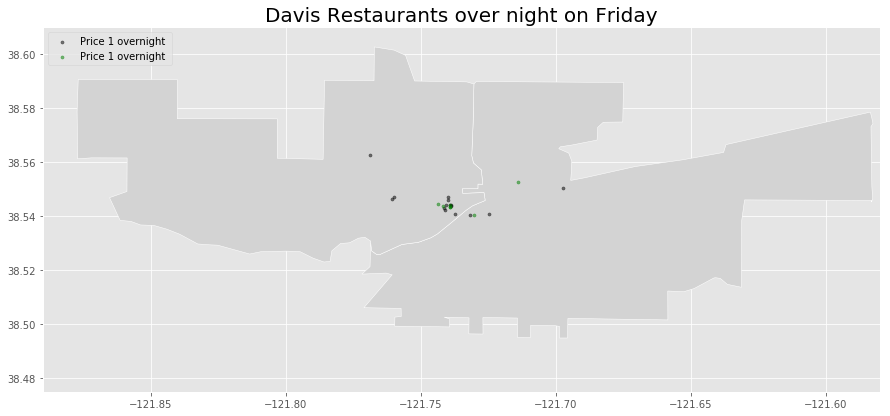

In [96]:
# Plotting
ax = Davis_Map.plot(color ="lightgray" , edgecolor ="white" , figsize = (15, 15))
davis_price_1_overnight.plot(ax= ax, color= "black", markersize=10, alpha=0.5 ,label="Price 1 overnight ")
davis_price_2_overnight.plot(ax= ax, color= "green", markersize=10, alpha=0.5 ,label="Price 1 overnight ")

plt.legend(loc=2)
plt.title('Davis Restaurants over night on Friday',fontsize=20 )

# Zoom out
#ax.set_xlim([-121.788, -121.7])
#ax.set_ylim([38.52, 38.57])

# Zoom in
ax.set_xlim([-121.89, -121.58])
ax.set_ylim([38.475, 38.61])

### 4.3 Mapping- Coffee Shops in Davis
1. Locations of coffee shops are similiar to the location of restaurants

(38.475, 38.61)

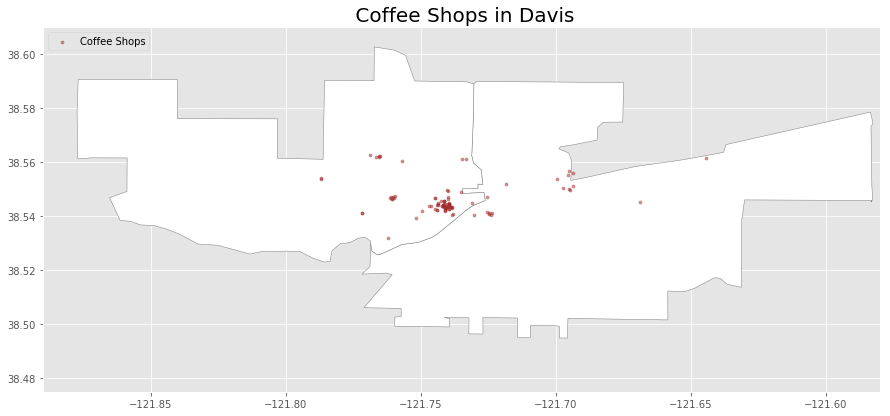

In [103]:
# Plotting
ax = Davis_Map.plot(color ="white" , edgecolor ="gray" , figsize = (15, 15))
davis_coffee_geo.plot(ax= ax, color= "brown", markersize=10, alpha=0.5 ,label="Coffee Shops")

plt.legend(loc=2)
plt.title(' Coffee Shops in Davis',fontsize=20 )

# Zoom out
#ax.set_xlim([-121.788, -121.7])
#ax.set_ylim([38.52, 38.57])

# Zoom in
ax.set_xlim([-121.89, -121.58])
ax.set_ylim([38.475, 38.61])

### 4.4 Mapping- SF Restaurants- Price 1&2&3&4
1. Here is the map including all restaurants in SF.
2. The background is the choropleth map to reflect the median house price of an area. The darker the color is, the more expensive the area is. The reason that we choose house price as the background is that in a city, the labor cost seems to equal and same as material cost. Thus the house price might be a critical factor affecting restaurant price.
3. It seems that there is no clear boundary among price 1,2,3 restaurants. In general, price 4 restaurants located in the more expensive area. This leads to our question: Is there any relationship between the area and the price of restaurants? 
4. Please see **Analysis Section 6.1 "Location vs Price"** for more details

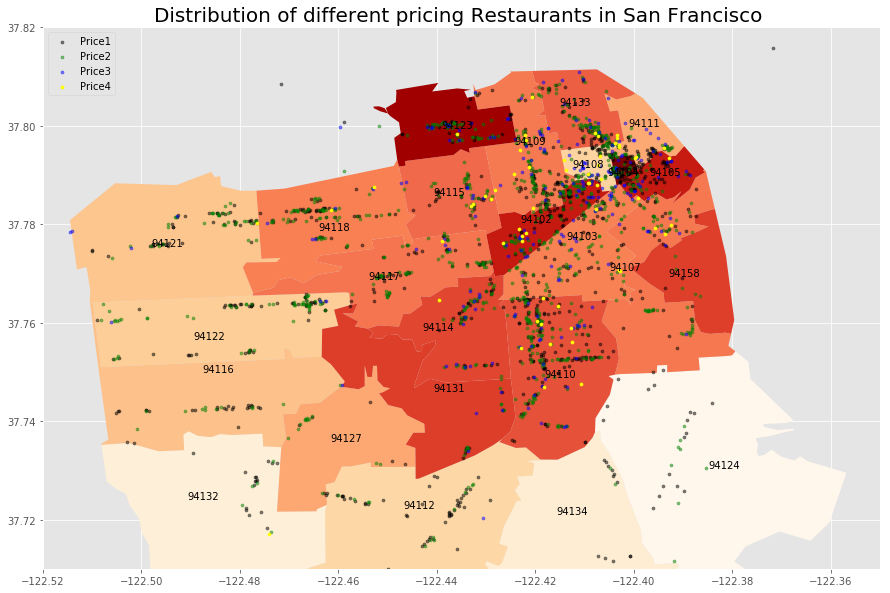

In [91]:
# Make the plot. Choropleth map Maps
ax = SF_Price_Map.plot(column = "MedianSoldPricePerSqft_AllHomes", cmap = "OrRd", figsize = (15, 15))

S =10
a =0.5
sf_price_1_geo.plot(ax= ax, color= "black", markersize= S, alpha=a, label="Price1")
sf_price_2_geo.plot(ax= ax, color= "green", markersize= S, alpha=a, label="Price2")
sf_price_3_geo.plot(ax= ax, color= "blue", markersize= S , alpha=a, label="Price3")
sf_price_4_geo.plot(ax= ax, color= "yellow", markersize= S,alpha=1, label="Price4")

plt.legend(loc=2)
plt.title('Distribution of different pricing Restaurants in San Francisco ',fontsize=20 )

# Set x and y limits to adjust the "zoom".
ax.set_xlim([-122.52, -122.35])
ax.set_ylim([37.71, 37.82])

# Given a row, this function gets a point and plots the county name at that point.
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row.RegionName, xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
SF_Price_Map.apply(add_label, axis = 1)

# Don't print out the result from the .apply().
plt.show()

### 4.5 Mapping -  SF Restaurants overnight on Friday
1. There is no price 4 restaurants open overnight on Friday
2. Comparing to Davis, SF has more clustering, suggesting that a big city has more locations for people to have night activity than a  small town

(37.71, 37.82)

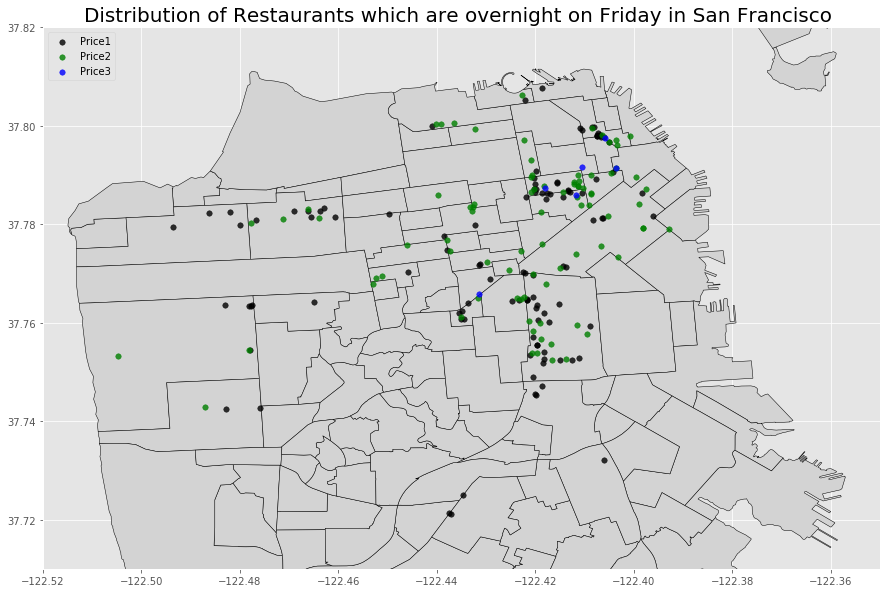

In [92]:
# Plotting
ax = SF_Map.plot(color ="lightgray" , edgecolor ="black" , figsize = (15, 15))

S =30
a =0.8

sf_price_1_overnight.plot(ax= ax, color= "black", markersize= S, alpha=a, label="Price1")
sf_price_2_overnight.plot(ax= ax, color= "green", markersize= S, alpha=a, label="Price2")
sf_price_3_overnight.plot(ax= ax, color= "blue", markersize= S , alpha=a, label="Price3")
#sf_price_4_overnight.plot(ax= ax, color= "yellow", markersize= S,alpha=1, label="Price4")  No price4 is overnight on Friday

plt.legend(loc=2)
plt.title('Distribution of Restaurants which are overnight on Friday in San Francisco ',fontsize=20 )

# Set x and y limits to adjust the "zoom".
ax.set_xlim([-122.52, -122.35])
ax.set_ylim([37.71, 37.82])

### 4.6 Mapping - Coffee Shops in SF
1. Locations of coffee shops are similiar to the location of restaurants

(37.71, 37.82)

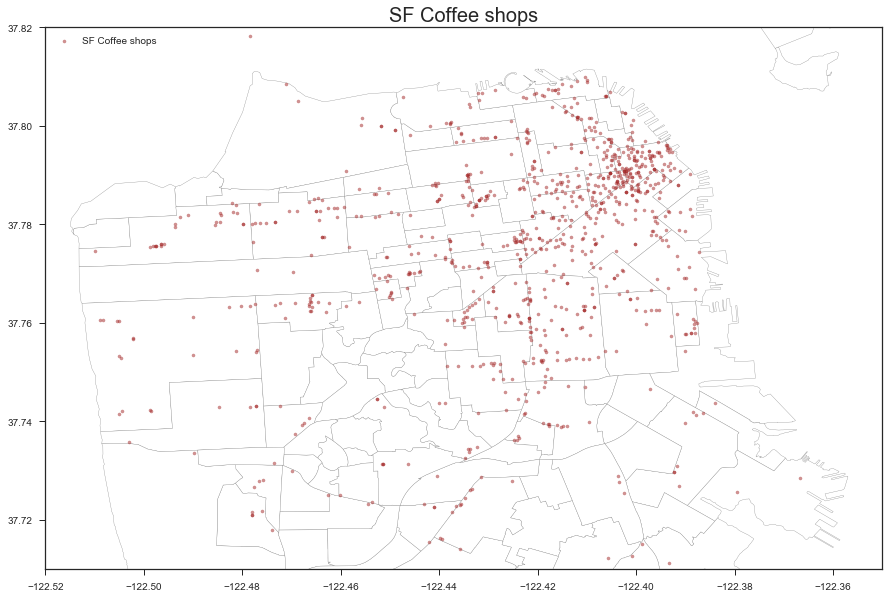

In [136]:
# Plotting
ax = SF_Map.plot(color ="white" , edgecolor ="gray" , figsize = (15, 15))

S =10
a =0.5

sf_coffee_geo .plot(ax= ax, color= "brown", markersize= S, alpha=a, label="SF Coffee shops")

plt.legend(loc=2)
plt.title('SF Coffee shops',fontsize=20 )

# Set x and y limits to adjust the "zoom".
ax.set_xlim([-122.52, -122.35])
ax.set_ylim([37.71, 37.82])

### 4.6 Rating v.s. Price
1. The mass of the ratings for price 1,2,3 restaurants seems to be between 3.5 and 4.5. The mass of rating for price 4 restaurants seem to be slightly higher between 4.0 and 4.5.
2. Is there the difference in rating among different price group? If so, which restaurants tned to have higher rating?
3. Please see **Analysis Section 6.2 "Rating vs Price"** for more details

Text(0.5,1,'Rating v.s. Price')

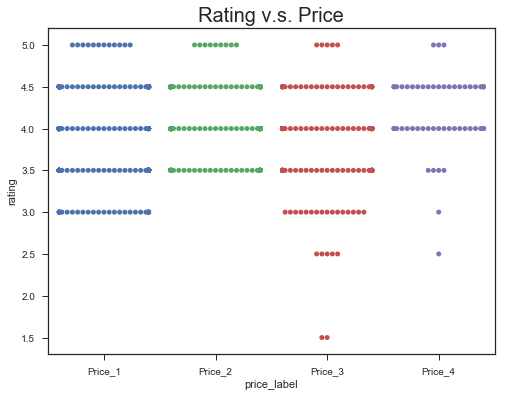

In [141]:
f, ax = plt.subplots(figsize=(8, 6))
sns.swarmplot(x="price_label", y="rating", data=SF_Big_DF)
plt.title('Rating v.s. Price',fontsize=20 )

### 4.7 Review count v.s. Price
1. It seems that people are more likely to leave review for the price 3 restaurants. 
2. Is there the difference in review count among different price group?
3. Please see Analysis Section 6.3 "Review count vs Price" for more details

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Review count v.s. Price')

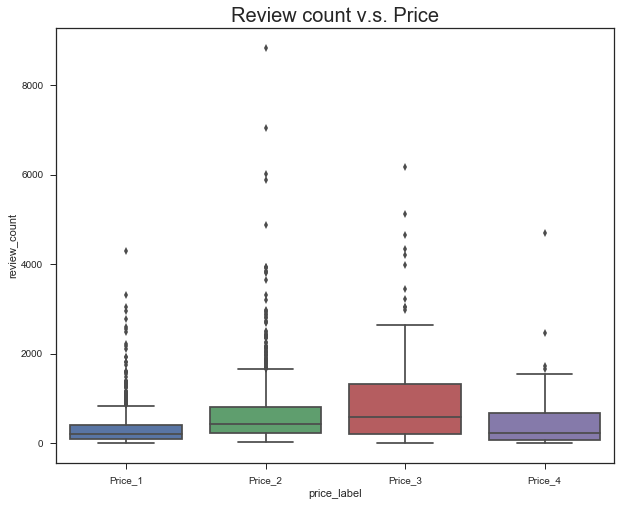

In [142]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x="price_label", y="review_count", data=SF_Big_DF)
plt.title('Review count v.s. Price',fontsize=20 )

### 4.8 Review count v.s. Rating
1. The trend between Review count and Rating shows that a restaurant with more review count might have a higher rating. However, since there are outliers, we hesitate to make a strong conclusion about this trend.

Text(0.5,1,'Review count v.s. Price')

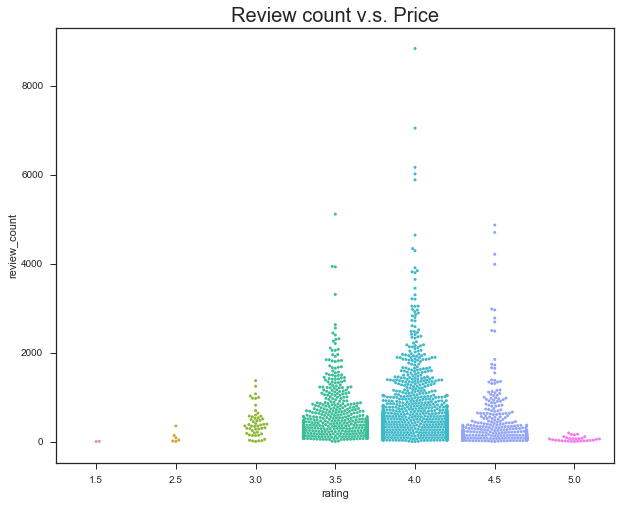

In [144]:
f, ax = plt.subplots(figsize=(10, 8))
sns.swarmplot(x="rating", y="review_count", size=3 ,data=SF_Big_DF)
plt.title('Review count v.s. Price',fontsize=20 )

 ## 5. Questions that We Want to Answer

### 5.1 Location v.s. Price
According to map sf restaurant - price1,2,3 and 4, we find that if we plot price equal 1 of restaurant, it distributed on map averagely. And the restaurant’s location of price equal 2 showed similar pattern.
However, restaurant’s location of price equal 3 showed narrow range on the map. The restaurant’s location of price equal 4 has the smallest range on the map. We like to find out why cause this result.

### 5.2 Rating v.s. Price
We like to test if there exists relationship between price and rating. To test it, we use Analysis of variance(ANOVA) and treat price as qualitative factor. We like to test if the mean of rating are different among the price factor.

### 5.3 View Count vs Price
We are interested in the relationship between review count and price. Which kinds of restaurant will have more review count? High price of low price?

## 6. Data analysis and resutls

### 6.1 Visualization for Restaurant Location v.s. Price in SF
**Results**
1. Price 1 Restaurants cover most SF area, same as Price 2 Restaurants
2. The distribution of Price 3 restaurants tends to be limited in the expensive neighborhoods. 
3. The distribution of Price 4 restaurants seems to only locate in the expensive neighborhoods.
4. We recognize that price 1 restaurants can still be found in the most expensive neighborhoods. We guess that the pricing strategy of inexpensive restaurants might lower their price and work long hours to increase the profit. 
5. In contrast, the high-end restaurants might just serve for high-end customers and operate fewer hours than the inexpensive restaurants.


#### Price 1 Restaurant 

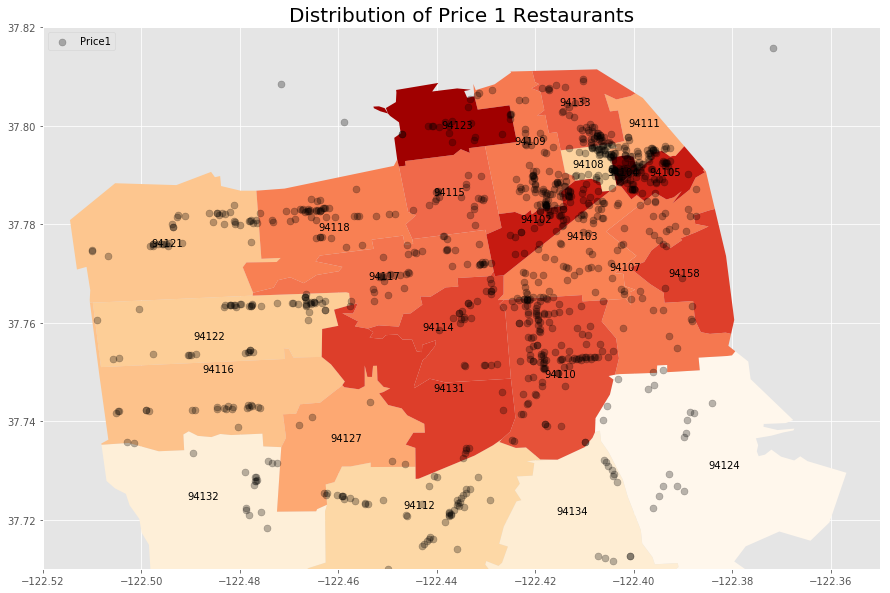

In [106]:
# Make the plot. Choropleth map Maps
ax = SF_Price_Map.plot(column = "MedianSoldPricePerSqft_AllHomes", cmap = "OrRd", figsize = (15, 15))

S =50
a =0.28
sf_price_1_geo.plot(ax= ax, color= "black", markersize= S, alpha=a, label="Price1")
#sf_price_2_geo.plot(ax= ax, color= "green", markersize= S, alpha=a, label="Price2")
#sf_price_3_geo.plot(ax= ax, color= "blue", markersize= S , alpha=a, label="Price3")
#sf_price_4_geo.plot(ax= ax, color= "yellow", markersize= S,alpha=1, label="Price4")

plt.legend(loc=2)
plt.title('Distribution of Price 1 Restaurants',fontsize=20 )

# Set x and y limits to adjust the "zoom".
ax.set_xlim([-122.52, -122.35])
ax.set_ylim([37.71, 37.82])

# Given a row, this function gets a point and plots the county name at that point.
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row.RegionName, xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
SF_Price_Map.apply(add_label, axis = 1)

# Don't print out the result from the .apply().
plt.show()

#### Price 2 Restaurant 

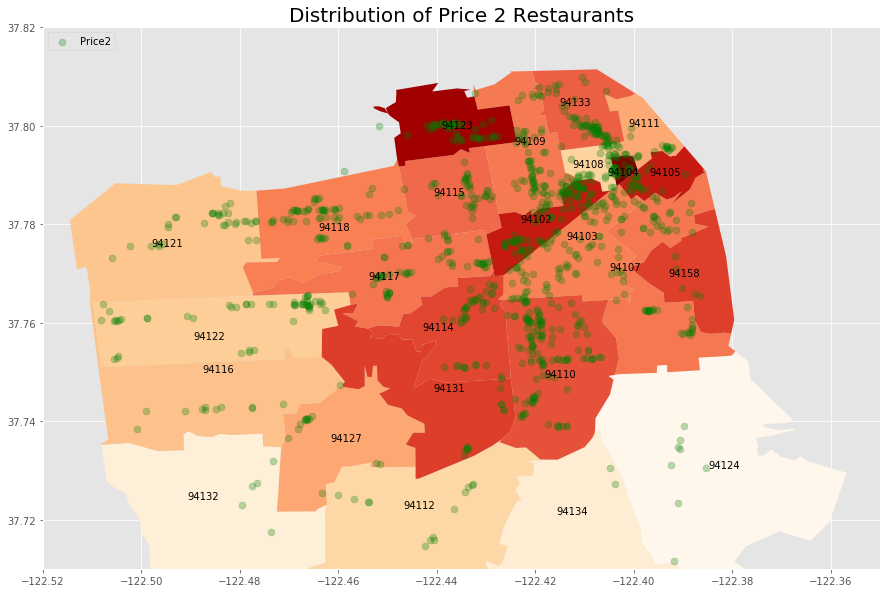

In [107]:
# Make the plot. Choropleth map Maps
ax = SF_Price_Map.plot(column = "MedianSoldPricePerSqft_AllHomes", cmap = "OrRd", figsize = (15, 15))

S =50
a =0.28
#sf_price_1_geo.plot(ax= ax, color= "black", markersize= S, alpha=a, label="Price1")
sf_price_2_geo.plot(ax= ax, color= "green", markersize= S, alpha=a, label="Price2")
#sf_price_3_geo.plot(ax= ax, color= "blue", markersize= S , alpha=a, label="Price3")
#sf_price_4_geo.plot(ax= ax, color= "yellow", markersize= S,alpha=1, label="Price4")

plt.legend(loc=2)
plt.title('Distribution of Price 2 Restaurants',fontsize=20 )

# Set x and y limits to adjust the "zoom".
ax.set_xlim([-122.52, -122.35])
ax.set_ylim([37.71, 37.82])

# Given a row, this function gets a point and plots the county name at that point.
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row.RegionName, xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
SF_Price_Map.apply(add_label, axis = 1)

# Don't print out the result from the .apply().
plt.show()

#### Price 3 Restaurant 

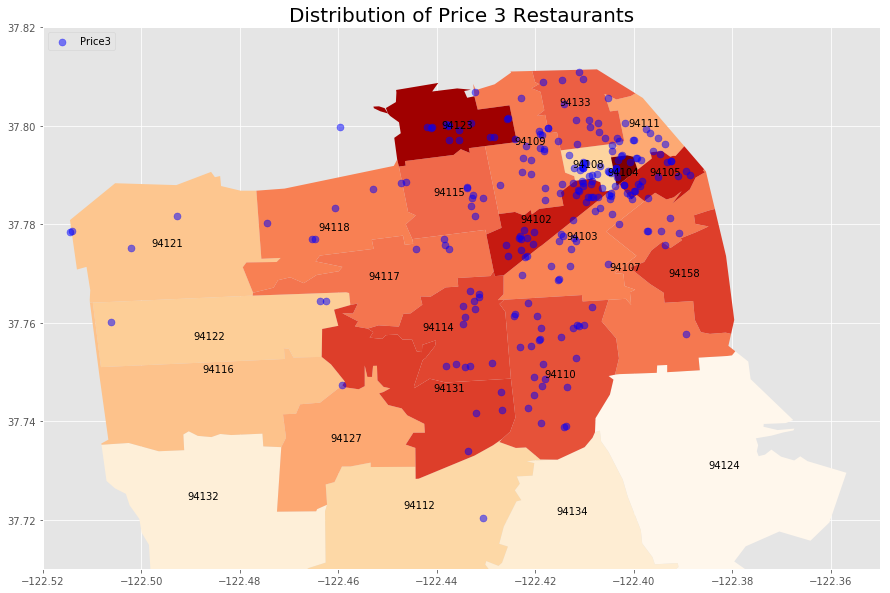

In [110]:
# Make the plot. Choropleth map Maps
ax = SF_Price_Map.plot(column = "MedianSoldPricePerSqft_AllHomes", cmap = "OrRd", figsize = (15, 15))

S =50
a =0.5
#sf_price_1_geo.plot(ax= ax, color= "black", markersize= S, alpha=a, label="Price1")
#sf_price_2_geo.plot(ax= ax, color= "green", markersize= S, alpha=a, label="Price2")
sf_price_3_geo.plot(ax= ax, color= "blue", markersize= S , alpha=a, label="Price3")
#sf_price_4_geo.plot(ax= ax, color= "yellow", markersize= S,alpha=1, label="Price4")

plt.legend(loc=2)
plt.title('Distribution of Price 3 Restaurants',fontsize=20 )

# Set x and y limits to adjust the "zoom".
ax.set_xlim([-122.52, -122.35])
ax.set_ylim([37.71, 37.82])

# Given a row, this function gets a point and plots the county name at that point.
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row.RegionName, xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
SF_Price_Map.apply(add_label, axis = 1)

# Don't print out the result from the .apply().
plt.show()

#### Price 4 Restaurant 

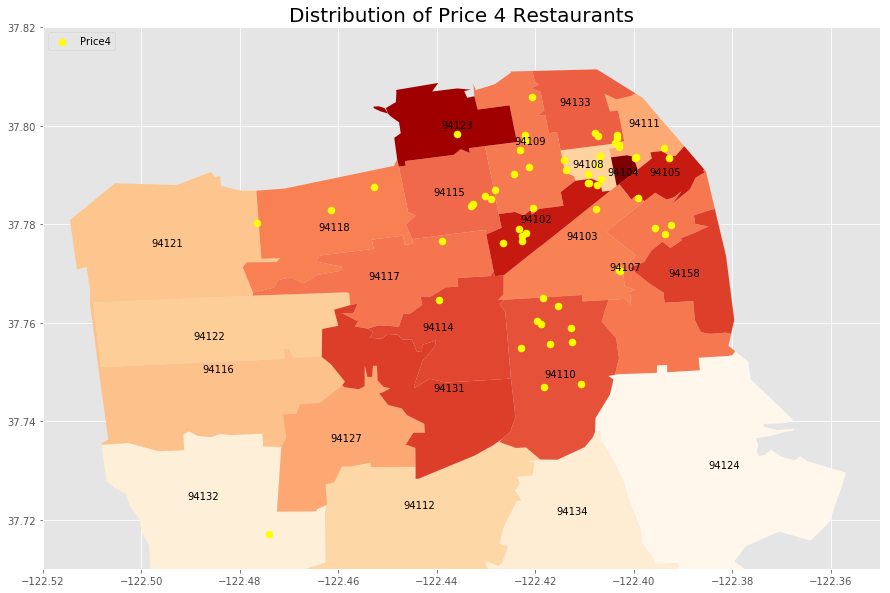

In [111]:
# Make the plot. Choropleth map Maps
ax = SF_Price_Map.plot(column = "MedianSoldPricePerSqft_AllHomes", cmap = "OrRd", figsize = (15, 15))

S =50
a =0.5
#sf_price_1_geo.plot(ax= ax, color= "black", markersize= S, alpha=a, label="Price1")
#sf_price_2_geo.plot(ax= ax, color= "green", markersize= S, alpha=a, label="Price2")
#sf_price_3_geo.plot(ax= ax, color= "blue", markersize= S , alpha=a, label="Price3")
sf_price_4_geo.plot(ax= ax, color= "yellow", markersize= S,alpha=1, label="Price4")

plt.legend(loc=2)
plt.title('Distribution of Price 4 Restaurants',fontsize=20 )

# Set x and y limits to adjust the "zoom".
ax.set_xlim([-122.52, -122.35])
ax.set_ylim([37.71, 37.82])

# Given a row, this function gets a point and plots the county name at that point.
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row.RegionName, xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
SF_Price_Map.apply(add_label, axis = 1)

# Don't print out the result from the .apply().
plt.show()

### 6.2 Analysis of Variance for Rating v.s. Price
**Recall the question: **
We like to test if there exists relationship between price and rating. To test it, we use Analysis of variance(ANOVA) and treat price as qualitative factor. We like to test if the mean of rating are different among the price factor.

In [128]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
#cw = pd.read_csv('/Users/foxeshen/Desktop/SF_Big_DF.csv')
cw = pd.read_csv('C:/Users/WeiKuang/Documents/GitHub/141B_Project/SF_Big_DF.csv')

cw_lm=ols('rating ~ price_label', data=cw).fit() 
print(sm.stats.anova_lm(cw_lm, typ=2))

                 sum_sq      df          F        PR(>F)
price_label   10.983215     3.0  24.822345  8.385890e-16
Residual     338.196802  2293.0        NaN           NaN


**Result: ** In this test, we find F = 24.822 and p-value<<<0.05. So we reject H0, and it means that not all the mean of rating among are same. We want to know which pairs(price) are different, so we test all the pairs of price in anova.  

In [129]:
#Get individual dataframe 
cw1=cw.loc[cw['price_label'] == 'Price_1' ]
cw2=cw.loc[cw['price_label'] == 'Price_2' ]
cw3=cw.loc[cw['price_label'] == 'Price_3' ]
cw4=cw.loc[cw['price_label'] == 'Price_4' ]

#merge the dataframe
cw12=pd.concat([cw1,cw2])
cw13=pd.concat([cw1,cw3])
cw14=pd.concat([cw1,cw4])
cw23=pd.concat([cw2,cw3])
cw24=pd.concat([cw2,cw4])
cw34=pd.concat([cw3,cw4])

In [130]:
#ANOVA 
cw_lm12=ols('rating ~ price_label', data=cw12).fit() 
print(sm.stats.anova_lm(cw_lm12, typ=2))
cw_lm13=ols('rating ~ price_label', data=cw13).fit() 
print(sm.stats.anova_lm(cw_lm13, typ=2))
cw_lm14=ols('rating ~ price_label', data=cw14).fit() 
print(sm.stats.anova_lm(cw_lm14, typ=2))
cw_lm23=ols('rating ~ price_label', data=cw23).fit() 
print(sm.stats.anova_lm(cw_lm23, typ=2))
cw_lm24=ols('rating ~ price_label', data=cw24).fit() 
print(sm.stats.anova_lm(cw_lm24, typ=2))
cw_lm34=ols('rating ~ price_label', data=cw34).fit() 
print(sm.stats.anova_lm(cw_lm34, typ=2))

                 sum_sq      df          F        PR(>F)
price_label    3.655125     1.0  27.708858  1.561550e-07
Residual     263.559750  1998.0        NaN           NaN
                 sum_sq      df          F    PR(>F)
price_label    1.900012     1.0  10.215524  0.001428
Residual     229.514835  1234.0        NaN       NaN
                 sum_sq      df         F    PR(>F)
price_label    3.709932     1.0  22.06684  0.000003
Residual     178.041717  1059.0       NaN       NaN
                 sum_sq      df          F        PR(>F)
price_label    6.552844     1.0  50.489871  2.020129e-12
Residual     160.155085  1234.0        NaN           NaN
                 sum_sq      df          F    PR(>F)
price_label    1.632830     1.0  15.910341  0.000071
Residual     108.681967  1059.0        NaN       NaN
                sum_sq     df          F    PR(>F)
price_label   6.066652    1.0  23.978201  0.000002
Residual     74.637052  295.0        NaN       NaN


**Result: ** All the p-value among these ANOVA test are smaller than 0.05. So we conclude that all mean of rating among price are different.

### 6.3 Kruskal–Wallis analysis for View Count vs Price 
Since there are outlier in the datasets, Kruskal–Wallis is appropriate to test whether there is the difference in review count among different prices.

#### This section is completed by R 
mydata = read.csv("SF_Big_DF.csv")

mydata$Rank = rank(mydata$review_count, ties = "average")

Group.order = aggregate(review_count ~ price_label, data = mydata, mean)$price_label
Xi = aggregate(review_count ~ price_label, data = mydata, mean)$review_count
si = aggregate(review_count ~ price_label, data = mydata, sd)$review_count
Ri = aggregate(Rank ~ price_label, data = mydata, mean)$Rank
ni = aggregate(review_count ~ price_label, data = mydata, length)$review_count

results = rbind(Xi,si,Ri,ni)
rownames(results) = c("Group Mean","Group SD","Rank Mean","Sample Size")
colnames(results) = as.character(Group.order)
results

SR.2 = var(mydata$Rank)

KW.OBS = 1/SR.2*sum(ni*(Ri - (nt+1)/2)^2) #Note, this assumes you calculate ni and Ri above

R = 4000

many.perms.KW = sapply(1:R,function(i){
  permuted.data = mydata #So we don't overwrite the original data
  permuted.data$price_label = sample(permuted.data$price_label, nrow(permuted.data), replace = FALSE) #Permuting the groups
  SR.2 = var(permuted.data$Rank)
  ni = aggregate(Rank ~ price_label, data = permuted.data,length)$Rank
  Ri = aggregate(Rank ~ price_label, data = permuted.data,mean)$Rank
  KW.i= 1/SR.2*sum(ni*(Ri - (nt+1)/2)^2) 
  return(KW.i)
})

p.value = mean(many.perms.KW > KW.OBS)

**Results**

* Y (the dependent variable) is review count

table           |Price_1      | Price_2  | Price_3  | Price_4 
----------------|-------------| ---------|----------|-----------------------------
`Group Mean`    |328.3610     | 658.2110 | 895.4915 | 544.5246
`Group SD `     |400.9708     | 746.0628 | 972.9162 | 772.5325
`Rank Mean  `   |894.7775     |1349.9965 |1407.9492 | 1019.7213
`Sample Size `  |1000.0000    |1000.0000 |236.0000  | 61.0000


- number of permutation = 10000
- KW.OBS  = 7045.66
- p.value = 0
- Decision: Since p.value is less than any reasonable significant level (0.1, 0.05, 0.01), so we reject Ho and conclude that at least one of the review count is different. It seems that price 3 restaurants tend to receive more review counts than others.

## 7. Conclusion

1. Restaurants with higher price tend to locate in the downtown or more expensive areas.
2. Restaurants with higher price tend to operate fewer hours than the inexpensive restaurants.
3. Price 4 restaurants might have a higher rating than restaurants with price 1, price 2, or price 3.
4. Restaurants with price 3 tend to have more review counts. However, the trend between reveiw count and price is unclear: it seemst that as pirce increases from price 1 to 3, the review count increases, except for price 4 restaurants. Maybe, price 4 restaurants are too expensive so that not everyone could afford it and then leave the review.